In [1]:
import pandas as pd
import seaborn as sns

from analysis_src.basic_data_inspection import DataTypeInspectionStrategy,SummaryStatisticsInspectionStrategy,DataInspector
from analysis_src.bivariate_analysis import CategoricalVsNumericalStrategy,NumericalVsNumericalStrategy,BivariateAnalyzer
from analysis_src.univariate_analysis import CategoricalUnivariateStrategy,NumericalUnivariateStrategy,UnivariateAnalyzer
from analysis_src.missing_value_analysis import SimpleMissingValuesAnalysis
from analysis_src.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
# Load the data
# Assuming you have already extracted the data into the 'extracted-data' folder

data_path = 'C:\AIML_Projects\End-To-End-Production-Graded-HousePrice-Prediction\extracted_data\AmesHousing.csv'
df = pd.read_csv(data_path)

In [3]:
#step1 : basic data inspection

data_inspector = DataInspector(DataTypeInspectionStrategy())
data_inspector.execute_inspection(df)


 Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-

In [4]:
# Switch strategy to Summary Statistics Inspection
data_inspector.set_startegy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


 Summary Statistics:
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.2453

Missing values per column:
Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        490
Lot Area              0
Street                0
Alley              2732
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type       1775
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       81
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating      

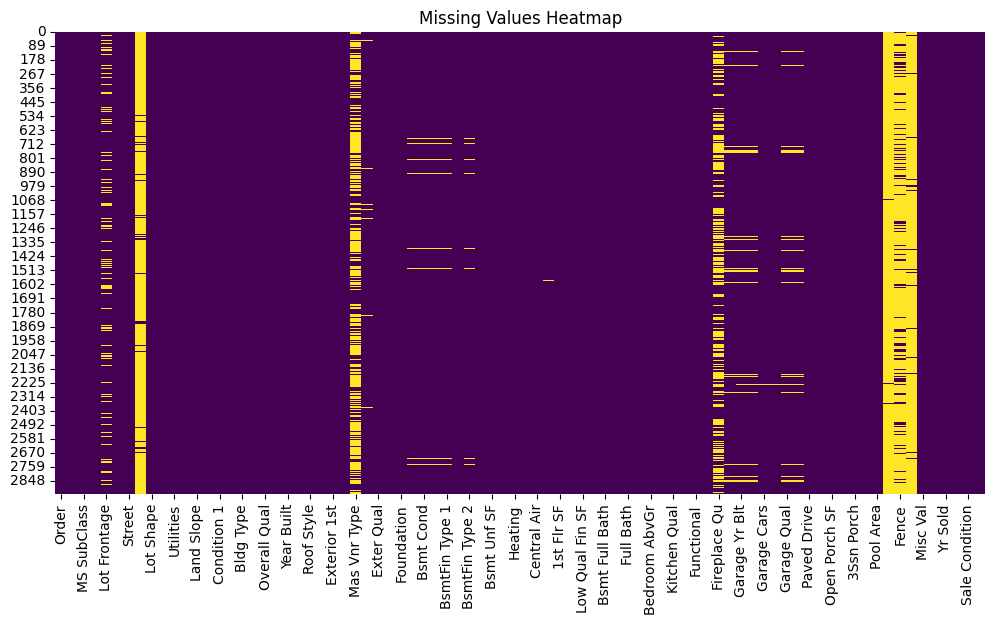

In [5]:
# Step 2: Missing Values Analysis
# ------------------------------------
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

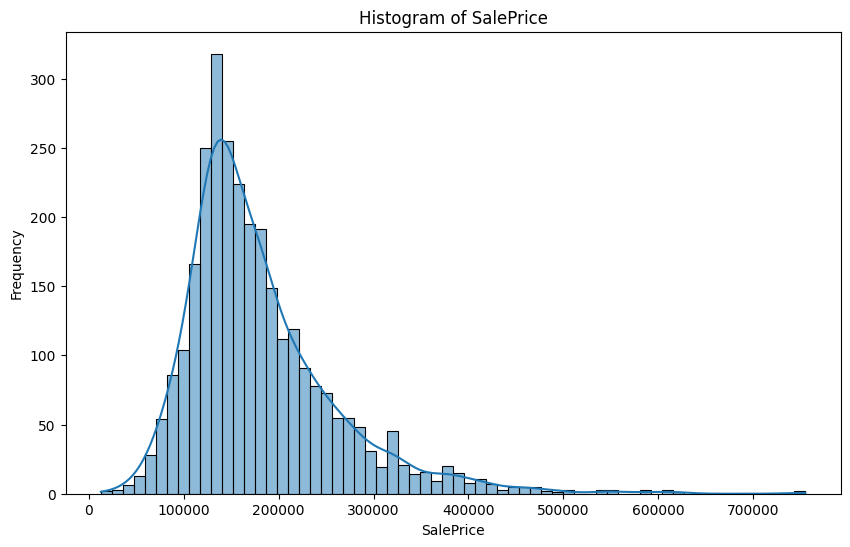

In [6]:
# Step 3: Univariate Analysis
# -----------------------------------
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateStrategy())
univariate_analyzer.execute_analysis(df, 'SalePrice')

c:\AIML_Projects\End-To-End-Production-Graded-HousePrice-Prediction\analysis\analysis_src\univariate_analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="muted")


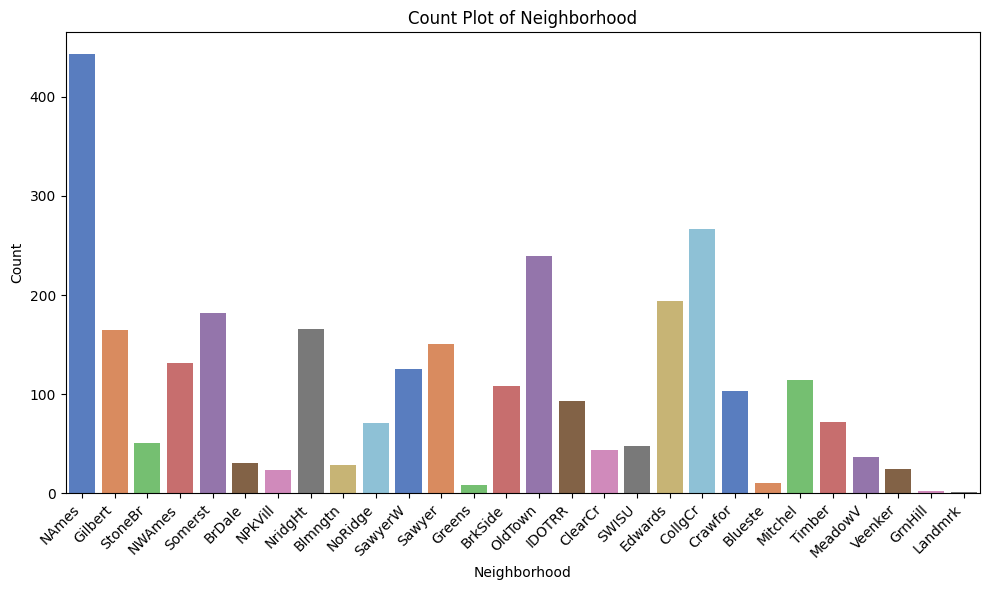

In [7]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateStrategy())
univariate_analyzer.execute_analysis(df, 'Neighborhood')


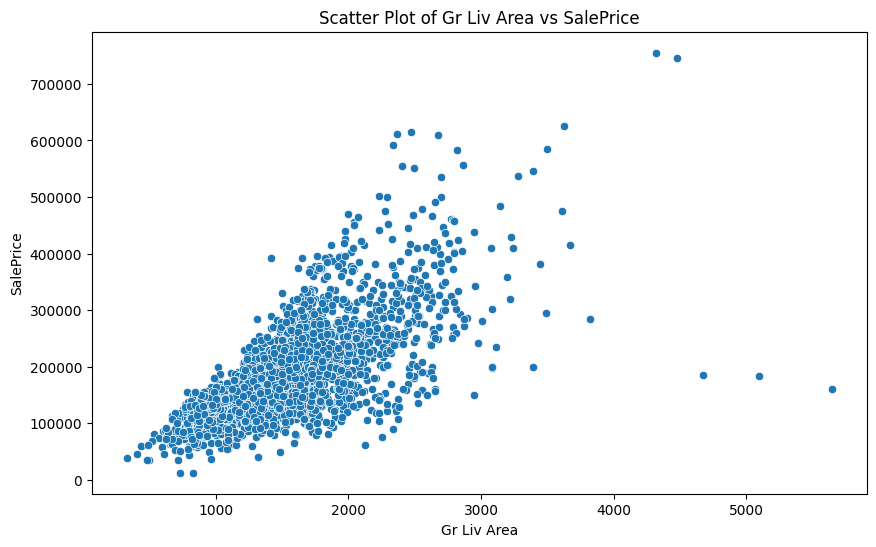

In [9]:
# Step 4: Bivariate Analysis
# -----------------------------------
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalStrategy())
bivariate_analyzer.execute_analysis(df, 'Gr Liv Area', 'SalePrice')


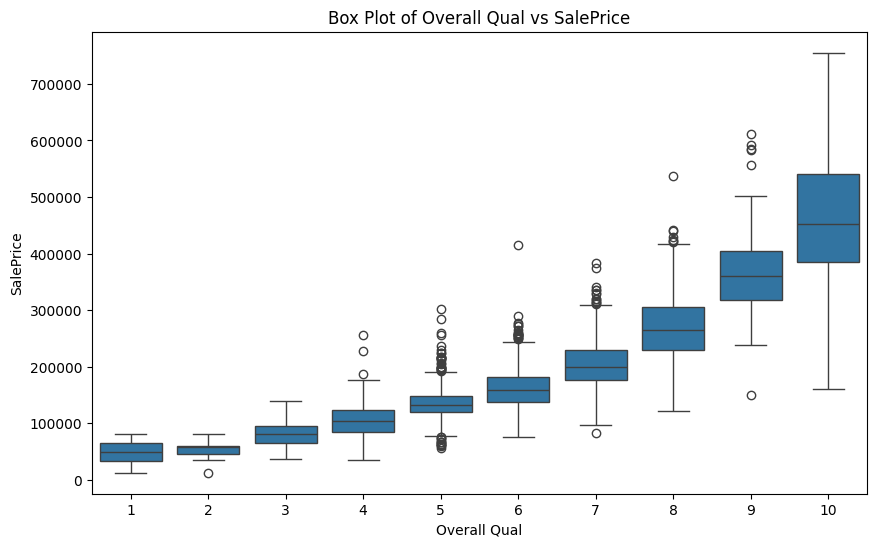

In [10]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalStrategy())
bivariate_analyzer.execute_analysis(df, 'Overall Qual', 'SalePrice')

### **Insights from Univariate and Bivariate Analysis**

#### **Step 3: Univariate Analysis**

1. **SalePrice Distribution (Numerical Feature)**:
   - **Insight**: The distribution of `SalePrice` is positively skewed, with the majority of house prices falling between $100,000 and $250,000. The peak frequency is around the $200,000 mark.
   - **Implication**: This skewness suggests that most homes in the dataset are relatively affordable, with fewer high-end properties. The long tail on the right side indicates a small number of more expensive homes, which may need special consideration during modeling (e.g., applying a log transformation to normalize the distribution).

2. **Neighborhood Distribution (Categorical Feature)**:
   - **Insight**: The `Neighborhood` feature shows a varied distribution, with `NAmes` being the most common neighborhood, followed by `CollgCr` and `OldTown`. Some neighborhoods have very few observations.
   - **Implication**: The high frequency of certain neighborhoods suggests that these areas could significantly influence overall housing prices. Neighborhoods with fewer observations might require careful handling to avoid overfitting during model training, potentially using techniques like frequency encoding or grouping similar neighborhoods together.

#### **Step 4: Bivariate Analysis**

1. **Gr Liv Area vs. SalePrice (Numerical vs. Numerical)**:
   - **Insight**: There is a strong positive correlation between `Gr Liv Area` (Above Ground Living Area) and `SalePrice`, indicating that larger homes generally sell for higher prices. The relationship appears mostly linear, but there are a few outliers, especially at higher `Gr Liv Area` values.
   - **Implication**: This linear relationship confirms that `Gr Liv Area` is likely a strong predictor of `SalePrice`. However, the presence of outliers (large homes with lower than expected prices) might require further investigation to determine whether they should be treated or removed.

2. **Overall Qual vs. SalePrice (Categorical vs. Numerical)**:
   - **Insight**: There is a clear positive relationship between `Overall Qual` (Overall Quality) and `SalePrice`, with higher quality ratings associated with significantly higher prices. The box plot shows increasing medians and ranges as quality improves, with some variability in each category.
   - **Implication**: `Overall Qual` is another strong predictor of `SalePrice`. The consistent increase in sale price with higher quality ratings suggests that homebuyers highly value quality. The variability within each category might be due to other factors influencing price, such as location or specific features not captured by `Overall Qual`.

### **Summary**:
- **Key Predictors**: Both `Gr Liv Area` and `Overall Qual` are strong predictors of `SalePrice`. These features should be emphasized in any predictive models.
- **Data Distribution**: The positive skew in `SalePrice` and the wide range of values for both `Gr Liv Area` and `Overall Qual` indicate the need for careful data preprocessing, including potential normalization or transformation of features.
- **Outliers**: Outliers in the relationship between `Gr Liv Area` and `SalePrice` need to be examined closely, as they may represent special cases (e.g., luxury homes) that could skew the model if not properly addressed.

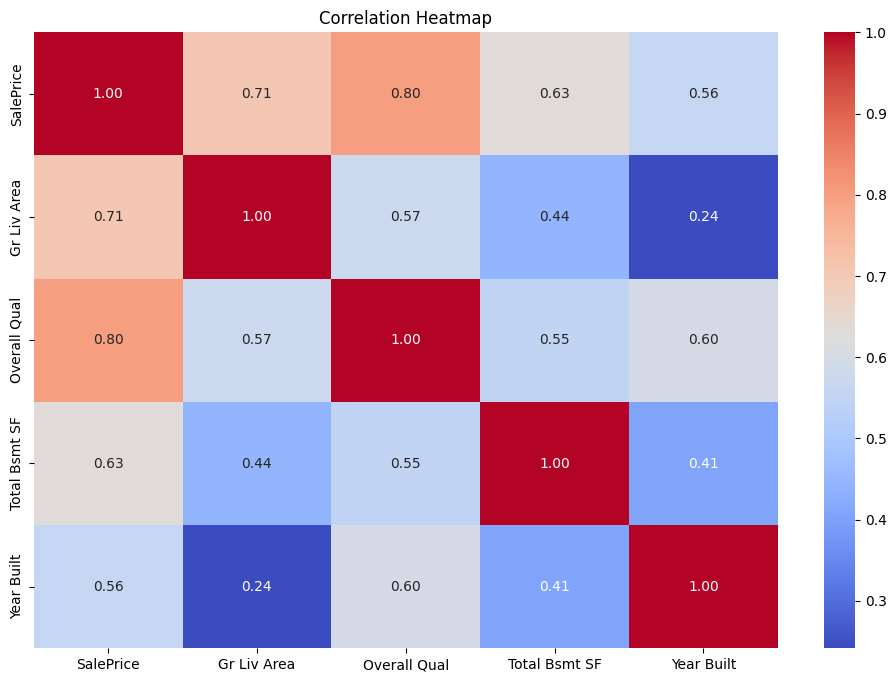

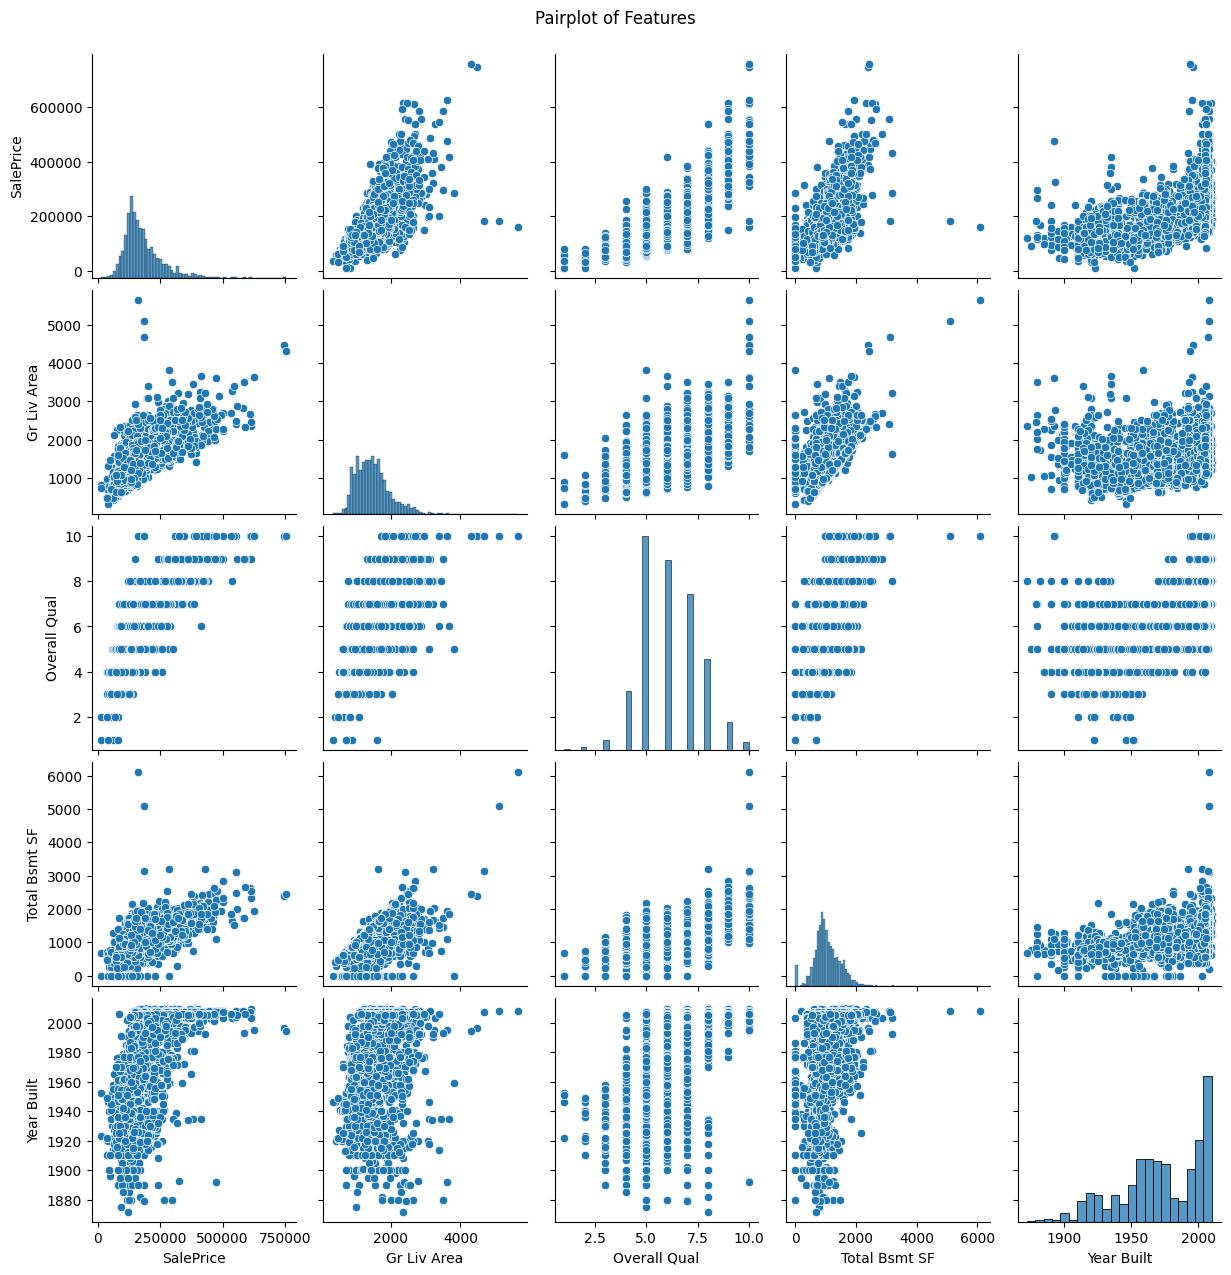

In [11]:

# Step 5: Multivariate Analysis
# ------------------------------
# Perform Multivariate Analysis

# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()

# Select important features for the analysis
selected_features = df[['SalePrice', 'Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Year Built']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)


### **Insights from Multivariate Analysis**

#### **Correlation Heatmap:**
1. **SalePrice and Overall Qual**:
   - **Insight**: The highest correlation observed is between `SalePrice` and `Overall Qual` (0.80). This strong positive correlation indicates that the overall quality of the house is a significant determinant of its price. 
   - **Implication**: `Overall Qual` should be considered a key predictor in the model. The high correlation suggests that this feature explains a substantial portion of the variance in house prices.

2. **SalePrice and Gr Liv Area**:
   - **Insight**: The correlation between `SalePrice` and `Gr Liv Area` (0.71) is also strong, indicating that larger homes generally have higher sale prices.
   - **Implication**: Similar to `Overall Qual`, `Gr Liv Area` is another critical predictor of `SalePrice`. This relationship aligns with the expectation that more living space increases a property's value.

3. **Total Bsmt SF**:
   - **Insight**: The correlation between `Total Bsmt SF` and `SalePrice` (0.63) is moderate, suggesting that the size of the basement contributes to the overall value but not as strongly as living area or quality.
   - **Implication**: `Total Bsmt SF` is an important feature, but it may require further exploration or interaction with other features to capture its full effect.

4. **Year Built**:
   - **Insight**: `Year Built` has a lower correlation with `SalePrice` (0.56). While newer homes tend to sell for more, this relationship is less pronounced than those with living area or quality.
   - **Implication**: The age of the house is a relevant factor but might be more meaningful when combined with other features like `Overall Qual` or `Remod/Add Year`.

#### **Pair Plot:**
1. **Linear Relationships**:
   - **Insight**: The pair plots confirm linear relationships between `SalePrice` and both `Gr Liv Area` and `Total Bsmt SF`, supporting their inclusion as linear predictors in the model.
   - **Implication**: These linear relationships suggest that linear models (or transformations) could effectively capture these predictors' contributions to `SalePrice`.

2. **Discrete Distribution of Overall Qual**:
   - **Insight**: `Overall Qual` appears as a discrete variable in the pair plots, with significant gaps between categories. This suggests that it is more ordinal in nature.
   - **Implication**: Given its ordinal nature, `Overall Qual` might be better treated as a categorical variable with ordered categories. This could improve the interpretability and performance of the model.

3. **Potential Multicollinearity**:
   - icollinearity, which could inflate variance in model coefficients.
   - **Implication**: Multicollinearity should be checked using Variance Inflation Factor (VIF) analysis. If multicollinearity is confirmed, techniques like feature selection, regularization, or Principal Component Analysis (PCA) might be needed.**Insight**: The strong correlations between `Gr Liv Area`, `Overall Qual`, and `Total Bsmt SF` suggest potential mult

### **Issues to Address:**
1. **Multicollinearity**:
   - **Issue**: The high correlations between key predictors could lead to multicollinearity in regression models, which could skew the results and reduce model interpretability.
   - **Action**: Conduct VIF analysis to check for multicollinearity. If detected, consider removing or combining correlated features, using regularization techniques, or applying PCA to reduce dimensionality.

2. **Feature Engineering**:
   - **Issue**: Features like `Overall Qual`, which is ordinal, might benefit from specific treatment (e.g., encoding as an ordinal variable) rather than being treated as continuous.
   - **Action**: Consider encoding `Overall Qual` as an ordinal variable. Also, explore interactions between features like `Gr Liv Area` and `Total Bsmt SF` to capture more complex relationships.

3. **Outliers**:
   - **Issue**: The pair plots indicate potential outliers, especially in `Gr Liv Area` and `SalePrice`. These could be high-leverage points that unduly influence model performance.
   - **Action**: Identify and analyze outliers to determine if they should be removed or if the model should be adjusted to account for them (e.g., using robust regression techniques).